In [91]:
import pandas as pd 
import  numpy as np

In [92]:
data = pd.read_csv('Bengaluru_House_Data.csv')

In [93]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [95]:
data.shape

(13320, 9)

In [96]:
for column in data.columns:
    print(data[column].value_counts())
    print("*"*20)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
********************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
********************
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
********************
size
2 BHK    

In [97]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [98]:
data.drop(columns=['area_type','availability','society','balcony'],inplace=True)

In [99]:
data.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [101]:
data['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [102]:
data['location']=data['location'].fillna('sarjapur road')

In [103]:
data['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [104]:
data['size']= data['size'].fillna('2 BHK')

In [105]:
data['bath']= data['bath'].fillna(data['bath'].median())

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [107]:
data['bhk']=data['size'].str.split().str.get(0).astype(int)

In [108]:
data[data.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [109]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [110]:
# Convert total_sqft to float values
def convertrange(x):
    try:
        tokens = x.split('-')
        if len(tokens) == 2:
            return (float(tokens[0]) + float(tokens[1])) / 2
        return float(x)
    except:
        return None

In [111]:
data['total_sqft'] = data['total_sqft'].apply(convertrange)
data = data.dropna(subset=['total_sqft'])

In [112]:
data['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [113]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [114]:
data['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13274 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13274 non-null  object 
 1   size        13274 non-null  object 
 2   total_sqft  13274 non-null  float64
 3   bath        13274 non-null  float64
 4   price       13274 non-null  float64
 5   bhk         13274 non-null  int32  
dtypes: float64(3), int32(1), object(2)
memory usage: 674.1+ KB


# price per square feet

In [116]:
data['price_per_sqft']= data['price']*100000/data['total_sqft']

In [117]:
data['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13274, dtype: float64

In [118]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13274.000000,13274.000000,13274.000000,1.327400e+04
mean,1559.626694,2.687359,112.453654,2.801718,7.907501e+03
std,1238.405258,1.336158,149.070368,1.291591,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [119]:
data['location'].value_counts()

location
Whitefield               538
Sarjapur  Road           399
Electronic City          302
Kanakpura Road           271
Thanisandra              233
                        ... 
BEML Layout 5th stage      1
Kannur                     1
singapura paradise         1
Uvce Layout                1
Abshot Layout              1
Name: count, Length: 1300, dtype: int64

In [120]:
data['location']=data['location'].apply(lambda x : x.strip())
location_count=data['location'].value_counts()

In [121]:
location_count

location
Whitefield                            539
Sarjapur  Road                        399
Electronic City                       304
Kanakpura Road                        271
Thanisandra                           236
                                     ... 
1Channasandra                           1
Hosahalli                               1
Vijayabank bank layout                  1
near Ramanashree California resort      1
Abshot Layout                           1
Name: count, Length: 1289, dtype: int64

In [122]:
location_count_less_10 = location_count[location_count<=10]
location_count_less_10

location
Kalkere                               10
Thyagaraja Nagar                      10
BTM 1st Stage                         10
Basapura                              10
Dodsworth Layout                      10
                                      ..
1Channasandra                          1
Hosahalli                              1
Vijayabank bank layout                 1
near Ramanashree California resort     1
Abshot Layout                          1
Name: count, Length: 1049, dtype: int64

In [123]:
data['location']=data['location'].apply(lambda x : 'other'if x in location_count_less_10 else x)

In [124]:
data['location'].value_counts()

location
other              2877
Whitefield          539
Sarjapur  Road      399
Electronic City     304
Kanakpura Road      271
                   ... 
Doddaballapur        11
Tindlu               11
Marsur               11
HAL 2nd Stage        11
Kodigehalli          11
Name: count, Length: 241, dtype: int64

# outlier detection and removal

In [125]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13274.000000,13274.000000,13274.000000,1.327400e+04
mean,1559.626694,2.687359,112.453654,2.801718,7.907501e+03
std,1238.405258,1.336158,149.070368,1.291591,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [126]:
(data['total_sqft']/data['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [127]:
data=data[((data['total_sqft']/data['bhk'])>=300)]
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [128]:
data.shape

(12530, 7)

In [129]:
data.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [130]:
# Remove extreme price per sqft outliers per location
def remove_outliers_sqft(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        gen_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, gen_df], ignore_index=True)
    return df_out

data = remove_outliers_sqft(data) 
data.describe()  

,total_sqft,bath,price,bhk,price_per_sqft
count,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000
mean,1508.585392,2.472044,91.294983,2.575325,5659.095970
std,880.774066,0.980018,86.343018,0.898664,2265.667258
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.994224
50%,1286.000000,2.000000,67.000000,2.000000,5175.792088
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [131]:
import numpy as np

# Remove BHK outliers
def bhk_outlier_remover(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(
                    exclude_indices,
                    bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values
                )
    return df.drop(exclude_indices.astype(int), axis=0)

data = bhk_outlier_remover(data)


In [132]:
data=bhk_outlier_remover(data)

In [133]:
data.shape

(6783, 7)

In [134]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10293,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10294,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10297,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10298,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [135]:
data.drop(columns=['size','price_per_sqft'],inplace=True)

# cleaned data

In [136]:
data.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [137]:
data.to_csv("cleaned_data.csv")

In [138]:
X=data.drop(columns=['price'])
y=data['price']

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [163]:
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size=0.2 , random_state=0)

In [186]:
import pandas as pd

# Assuming X_train and y_train are Pandas objects
# Use the column transformer to preprocess X_train
X_train_transformed = column_trans.fit_transform(X_train)
x_train=X_train_transformed
y_train = y_train.astype('int64')


In [187]:
print(X_train.shape)
print(X_test.shape)

(5426, 4)
(1357, 4)


# Applying linear Regression 

In [188]:
column_trans = make_column_transformer(
    (OneHotEncoder(sparse_output=False), ['location']),
    remainder='passthrough',
    force_int_remainder_cols=False  # This suppresses the warning
)


In [189]:
scaler= StandardScaler()

In [190]:
lr = LinearRegression()

In [191]:
pipe=make_pipeline(column_trans,scaler,lr)

In [192]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [193]:
y_pred_lr=pipe.predict(X_test)

In [194]:
r2_score(y_test,y_pred_lr)

0.8628392246663861

# Applying Lasso

In [195]:
lasso=Lasso()

In [196]:
pipe=make_pipeline(column_trans,scaler,lasso)

In [197]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [198]:
y_pred_lasso=pipe.predict(X_test)

In [199]:
r2_score(y_test,y_pred_lasso)

0.8553886795175831

# applying rigde

In [200]:
ridge=Ridge()

In [201]:
pipe=make_pipeline(column_trans,scaler,ridge)

In [202]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [203]:
y_pred_ridge=pipe.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.8628824169391446

In [204]:
print("no regularization:",r2_score(y_test,y_pred_lr))
print("Lasso:",r2_score(y_test,y_pred_lasso))
print("Ridge:",r2_score(y_test,y_pred_ridge))

no regularization: 0.8628392246663861
Lasso: 0.8553886795175831
Ridge: 0.8628824169391446


# feature importance

C:\Users\khush\AppData\Local\Temp\ipykernel_15136\3345180735.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances[:15], y=sorted_importances.index[:15], palette="coolwarm")


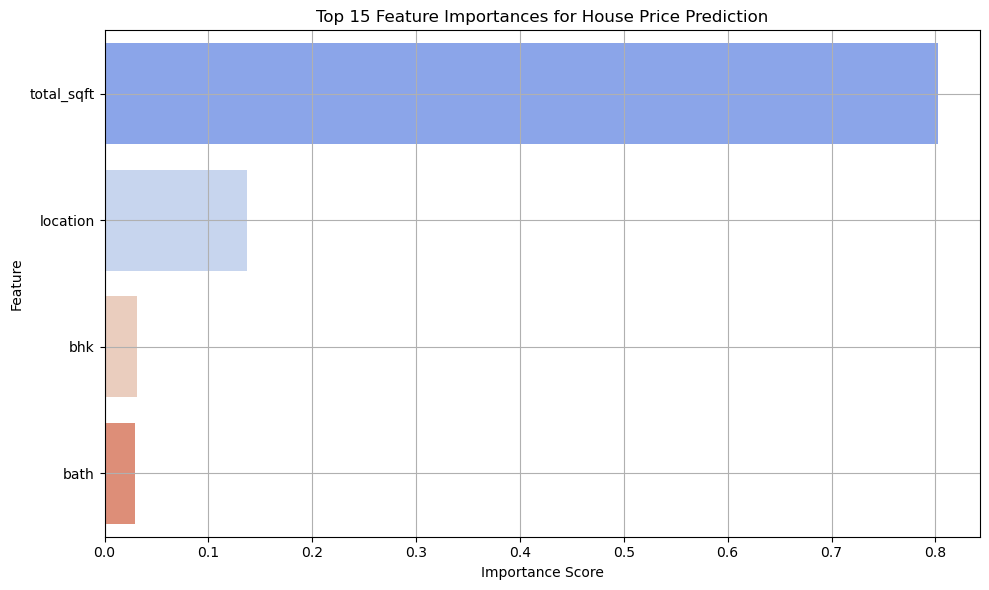

total_sqft    0.802803
location      0.137375
bhk           0.030958
bath          0.028864
dtype: float64


In [219]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Encode categorical columns
label_encoder = LabelEncoder()
for column in X_train.select_dtypes(include=['object']).columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])

# Fit Random Forest model for feature importance
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot the top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances[:15], y=sorted_importances.index[:15], palette="coolwarm")
plt.title("Top 15 Feature Importances for House Price Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.grid(True)
plt.show()

# Display top 15 features
print(sorted_importances.head(15))

In [209]:
print(X_train.dtypes)
print(y_train.dtypes)

location        int32
total_sqft    float64
bath          float64
bhk             int32
dtype: object
int64


In [220]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2_train = r2_score(y_train, rf_model.predict(X_train))
r2_test = r2_score(y_test, rf_model.predict(X_test))
rmse_train = np.sqrt(mean_squared_error(y_train, rf_model.predict(X_train)))
rmse_test = np.sqrt(mean_squared_error(y_test, rf_model.predict(X_test)))

print(f"R² (Train): {r2_train}, R² (Test): {r2_test}")
print(f"RMSE (Train): {rmse_train}, RMSE (Test): {rmse_test}")

R² (Train): 0.95756114420037, R² (Test): 0.7939137601502652
RMSE (Train): 19.058405053118495, RMSE (Test): 38.242182809208956


In [221]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [227]:
# Retrain the Random Forest model with the best parameters
best_params = grid_search.best_params_

rf_model_optimized = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

# Fit the model on the training data
rf_model_optimized.fit(X_train, y_train)

# Evaluate the model on the test data
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred = rf_model_optimized.predict(X_test)
r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Optimized R² (Test): {r2_test}")
print(f"Optimized RMSE (Test): {rmse_test}")

Optimized R² (Test): 0.7772378289936223
Optimized RMSE (Test): 39.75931527068565


In [230]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 1.0 MB/s eta 0:02:23
   ---------------------------------------- 0.5/150.0 MB 1.0 MB/s eta 0:02:23
   ---------------------------------------- 0.8/150.0 MB 684.4 kB/s eta 0:03:38
   ---------------------------------------- 0.8/150.0 MB 684.4 kB/s eta 0:03:38
   ---------------------------------------- 1.0/150.0 MB 751.1 kB/s eta 0:03:19
   ---------------------------------------- 1.3/150.0 MB 789.6 kB/s eta 0:03:09
   ---------------------------------------- 1.6/150.0 MB 830.6 kB/s eta 0:02:59
    --------------------------------------- 2.1/150.0 MB 1.0 MB/s eta 0:02:25
    -------

In [231]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Initialize and train the XGBoost model
xgb_model = XGBRegressor(
    n_estimators=100,  # Number of trees
    max_depth=5,       # Maximum depth of trees
    learning_rate=0.1, # Learning rate
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
r2_test_xgb = r2_score(y_test, y_pred_xgb)
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"XGBoost R² (Test): {r2_test_xgb}")
print(f"XGBoost RMSE (Test): {rmse_test_xgb}")

XGBoost R² (Test): 0.846072232438887
XGBoost RMSE (Test): 33.05039550363521


In [232]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1]
}

grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
{'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1}


In [233]:
residuals = y_test - y_pred_xgb

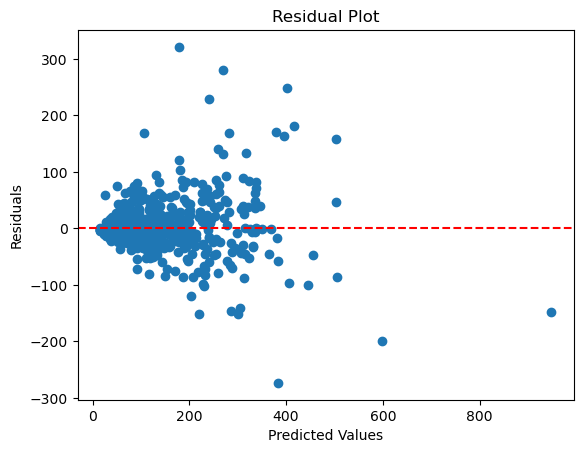

In [234]:
import matplotlib.pyplot as plt

plt.scatter(y_pred_xgb, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

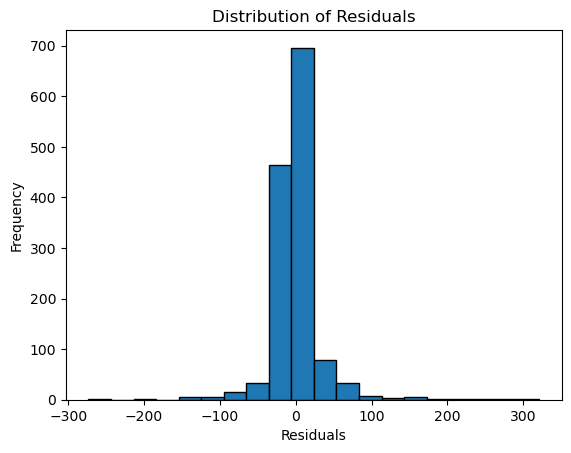

In [235]:
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [236]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Best hyperparameters from GridSearchCV
best_params = {
    'colsample_bytree': 0.6,
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 300,
    'subsample': 1
}

# Retrain the model with the best parameters
xgb_best_model = XGBRegressor(
    colsample_bytree=best_params['colsample_bytree'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    subsample=best_params['subsample'],
    random_state=42
)
xgb_best_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_xgb_best = xgb_best_model.predict(X_test)
r2_test_best = r2_score(y_test, y_pred_xgb_best)
rmse_test_best = np.sqrt(mean_squared_error(y_test, y_pred_xgb_best))

print(f"Optimized XGBoost R² (Test): {r2_test_best}")
print(f"Optimized XGBoost RMSE (Test): {rmse_test_best}")


Optimized XGBoost R² (Test): 0.894489707617279
Optimized XGBoost RMSE (Test): 27.363118346511985


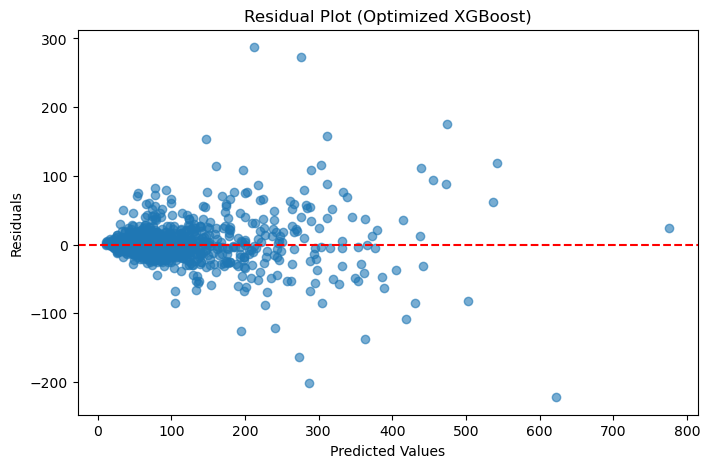

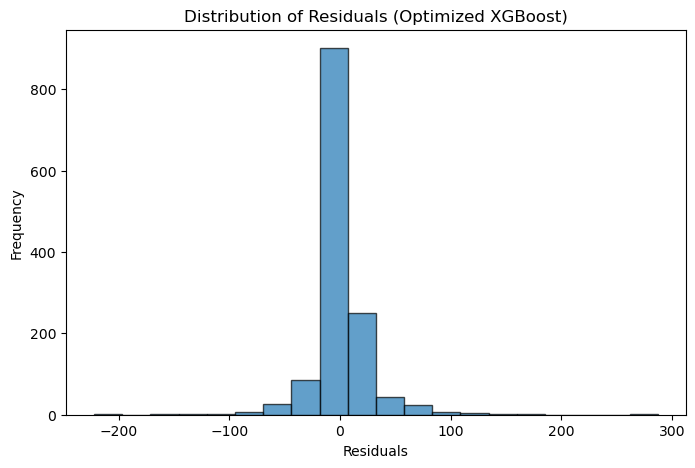

In [237]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals_best = y_test - y_pred_xgb_best

# Residual Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_xgb_best, residuals_best, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Optimized XGBoost)')
plt.show()

# Histogram of Residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals_best, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Optimized XGBoost)')
plt.show()

In [239]:
import numpy as np
import pandas as pd

# Calculate residuals
residuals_best = y_test - y_pred_xgb_best

# Define threshold for outliers (e.g., 2 standard deviations)
threshold = 2 * np.std(residuals_best)

# Identify outliers
outliers = np.where(np.abs(residuals_best) > threshold)

# Investigate outliers
outlier_indices = outliers[0]  # Extract the array of indices from the tuple
outlier_data = pd.DataFrame({
    'Actual': y_test.iloc[outlier_indices],
    'Predicted': y_pred_xgb_best[outlier_indices],
    'Residual': residuals_best.iloc[outlier_indices]
})
print("Outliers:\n", outlier_data)

Outliers:
       Actual   Predicted    Residual
4942   399.0  290.118805  108.881195
5791   598.0  536.739319   61.260681
7570   290.0  223.922104   66.077896
1395   140.0  201.684738  -61.684738
9518   280.0  203.224335   76.775665
...      ...         ...         ...
8497    37.5  104.519936  -67.019936
7763   220.0  288.134552  -68.134552
9141   325.0  388.932495  -63.932495
5821   408.0  339.099884   68.900116
3544   275.0  160.852905  114.147095

[67 rows x 3 columns]


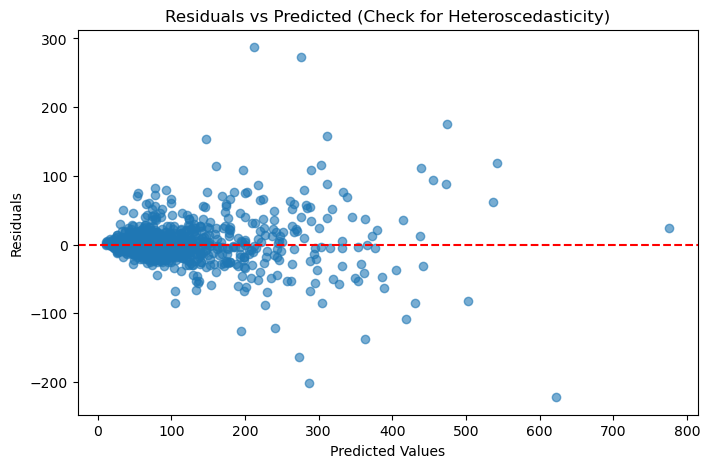

Breusch-Pagan Test p-value: 9.680516176394895e-42


In [240]:
import matplotlib.pyplot as plt
import statsmodels.stats.diagnostic as smd

# Residual Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_xgb_best, residuals_best, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (Check for Heteroscedasticity)')
plt.show()

# Breusch-Pagan test
import statsmodels.api as sm
exog = sm.add_constant(y_pred_xgb_best)  # Add a constant for the test
bp_test = smd.het_breuschpagan(residuals_best, exog)
print(f"Breusch-Pagan Test p-value: {bp_test[1]}")

In [241]:
# Assuming X_test is your test dataset with features
outlier_features = X_test.iloc[outliers]
print("Feature Values of Outliers:\n", outlier_features.describe())

Feature Values of Outliers:
          location    total_sqft       bath        bhk
count   67.000000     67.000000  67.000000  67.000000
mean   156.477612   2912.819552   3.835821   3.761194
std     84.005115   1631.741978   2.129141   2.118387
min      1.000000   1000.000000   1.000000   1.000000
25%     70.500000   1986.955000   3.000000   3.000000
50%    193.000000   2500.000000   3.000000   3.000000
75%    240.000000   3507.500000   5.000000   4.000000
max    240.000000  10000.000000  16.000000  16.000000


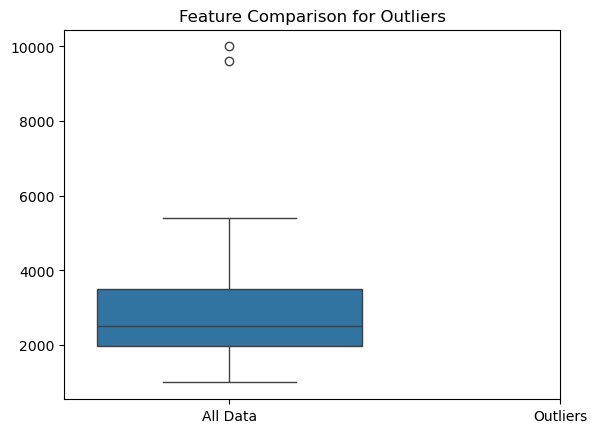

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Comparing a particular feature (e.g., 'total_sqft')
sns.boxplot(data=[X_test['total_sqft'], outlier_features['total_sqft']], showfliers=True)
plt.xticks([0, 1], ['All Data', 'Outliers'])
plt.title('Feature Comparison for Outliers')
plt.show()

In [244]:
# Sort residuals to identify extreme cases
extreme_cases = outlier_data.sort_values(by='Residual', ascending=False)  # Sort by residual values
top_positive = extreme_cases.head(5)  # Top 5 largest positive residuals
top_negative = extreme_cases.tail(5)  # Top 5 largest negative residuals

# Analyze feature values for extreme cases
print("Top Positive Residuals:\n", top_positive)
print("Top Negative Residuals:\n", top_negative)

# Feature analysis for specific cases
positive_features = X_test.loc[top_positive.index]
negative_features = X_test.loc[top_negative.index]

print("Feature Values for Top Positive Residual Cases:\n", positive_features)
print("Feature Values for Top Negative Residual Cases:\n", negative_features)

Top Positive Residuals:
       Actual   Predicted    Residual
2541   500.0  212.755966  287.244034
8629   550.0  276.470490  273.529510
1181   650.0  474.537811  175.462189
1182   470.0  311.425110  158.574890
46     300.0  146.542542  153.457458
Top Negative Residuals:
       Actual   Predicted    Residual
1883    68.0  194.211853 -126.211853
572    225.0  362.759369 -137.759369
1642   110.0  273.565552 -163.565552
9       85.0  286.212646 -201.212646
2391   400.0  622.196228 -222.196228
Feature Values for Top Positive Residual Cases:
       location  total_sqft  bath  bhk
2541        90      2040.0   4.0    5
8629       240     10000.0  16.0   16
1181        44      4460.0   5.0    4
1182        44      2850.0   4.0    3
46           4      5100.0   5.0    6
Feature Values for Top Negative Residual Cases:
       location  total_sqft  bath  bhk
1883        76      2700.0   3.0    4
572         23      2400.0   4.0    5
1642        61      4000.0   7.0    8
9            1      1500.0  

C:\Users\khush\AppData\Local\Temp\ipykernel_15136\357715430.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_outliers[feature], label='Non-Outliers', shade=True, color='blue')
C:\Users\khush\AppData\Local\Temp\ipykernel_15136\357715430.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(outlier_features[feature], label='Outliers', shade=True, color='red')


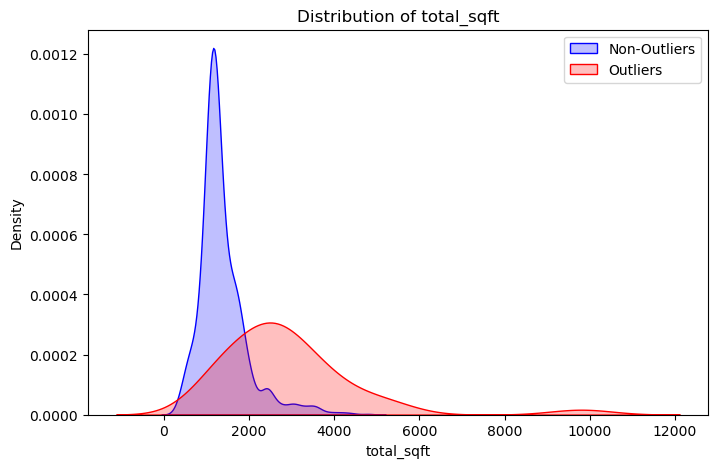

C:\Users\khush\AppData\Local\Temp\ipykernel_15136\357715430.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_outliers[feature], label='Non-Outliers', shade=True, color='blue')
C:\Users\khush\AppData\Local\Temp\ipykernel_15136\357715430.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(outlier_features[feature], label='Outliers', shade=True, color='red')


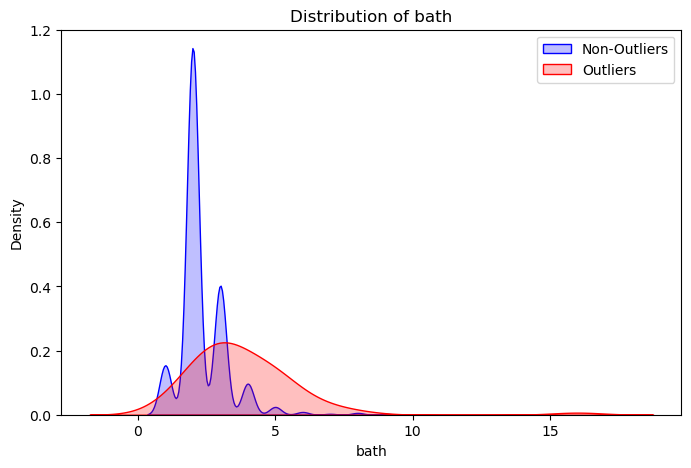

C:\Users\khush\AppData\Local\Temp\ipykernel_15136\357715430.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_outliers[feature], label='Non-Outliers', shade=True, color='blue')
C:\Users\khush\AppData\Local\Temp\ipykernel_15136\357715430.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(outlier_features[feature], label='Outliers', shade=True, color='red')


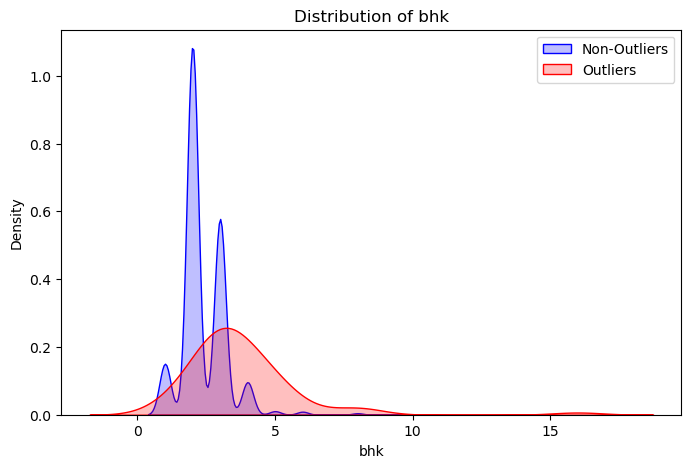

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine outliers and non-outliers for comparison
non_outliers = X_test.drop(index=extreme_cases.index)

# Visualize distributions for key features (e.g., total_sqft, bath, bhk)
features_to_plot = ['total_sqft', 'bath', 'bhk']
for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(non_outliers[feature], label='Non-Outliers', shade=True, color='blue')
    sns.kdeplot(outlier_features[feature], label='Outliers', shade=True, color='red')
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()

In [247]:
# Apply log transformation to reduce skewness
X_test['total_sqft_log'] = np.log1p(X_test['total_sqft'])
X_test['bath_log'] = np.log1p(X_test['bath'])
X_test['bhk_log'] = np.log1p(X_test['bhk'])

In [248]:
# Calculate price per square foot
X_test['price_per_sqft'] = y_test / X_test['total_sqft']

In [250]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Ensure X_test has the same columns as X_train
X_test_aligned = X_test[X_train.columns]

# Define and retrain the XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_updated = xgb_model.predict(X_test_aligned)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_updated))
r2 = r2_score(y_test, y_pred_updated)
print(f'Updated Model RMSE: {rmse}')
print(f'Updated Model R²: {r2}')

Updated Model RMSE: 30.153483921053954
Updated Model R²: 0.8718735940205055


In [252]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the model
xgb_model = XGBRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Output the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model
best_xgb_model = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


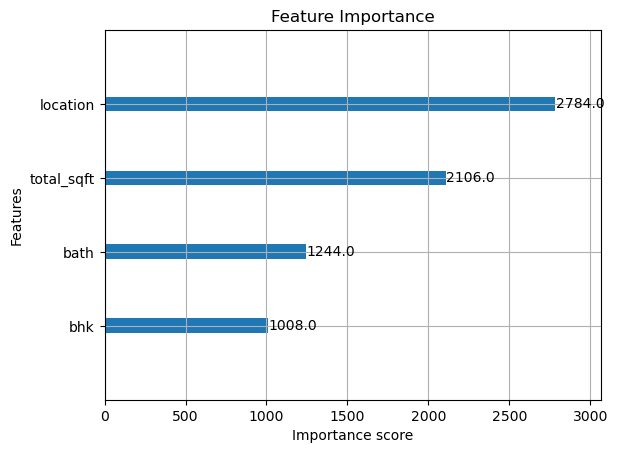

In [253]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance
xgb.plot_importance(best_xgb_model, importance_type='weight')
plt.title('Feature Importance')
plt.show()

In [254]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Perform k-fold cross-validation
cv_scores = cross_val_score(best_xgb_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = [(-score)**0.5 for score in cv_scores]
print("Cross-Validation RMSE Scores:", rmse_scores)
print("Mean RMSE:", sum(rmse_scores) / len(rmse_scores))

Cross-Validation RMSE Scores: [64.63261571807543, 35.19225574852669, 30.48624129959134, 31.147817482681315, 37.36777582899746]
Mean RMSE: 39.765341215574445


In [256]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Define base models
base_models = [
    ('xgb', XGBRegressor(random_state=42)),
    ('rf', RandomForestRegressor(random_state=42))
]

# Define stacking model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())
# Align X_test with X_train columns
X_test_aligned = X_test[X_train.columns]

# Fit the stacking model
stacking_model.fit(X_train, y_train)

# Evaluate stacking model
stacking_rmse = mean_squared_error(y_test, stacking_model.predict(X_test_aligned), squared=False)
print("Stacking Model RMSE:", stacking_rmse)

Stacking Model RMSE: 29.473126491671824


c:\Users\khush\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [258]:
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the XGBoost model with the best parameters
best_xgb_model = XGBRegressor(
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=300,
    subsample=0.8,
    random_state=42
)

# Train the model on the training data
best_xgb_model.fit(X_train, y_train)

# Align X_test with X_train columns
X_test_aligned = X_test[X_train.columns]

# Predict on the aligned test dataset
y_pred_final = best_xgb_model.predict(X_test_aligned)

# Evaluate the model's performance
final_rmse = mean_squared_error(y_test, y_pred_final, squared=False)
final_r2 = r2_score(y_test, y_pred_final)

print(f"Final Model RMSE: {final_rmse}")
print(f"Final Model R²: {final_r2}")

Final Model RMSE: 27.93222553790705
Final Model R²: 0.890055191009139


c:\Users\khush\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


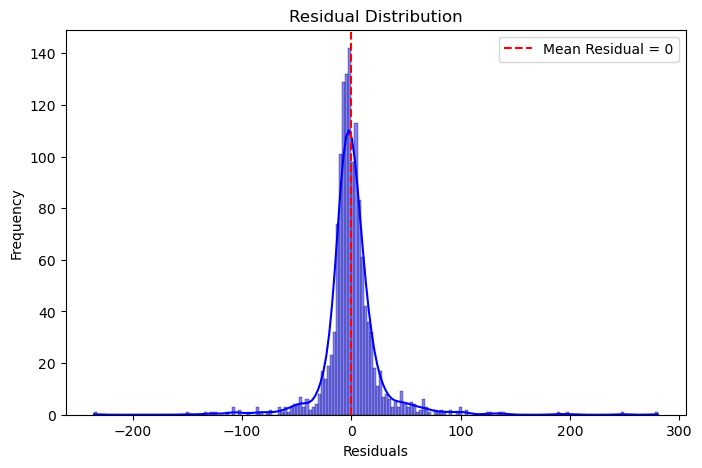

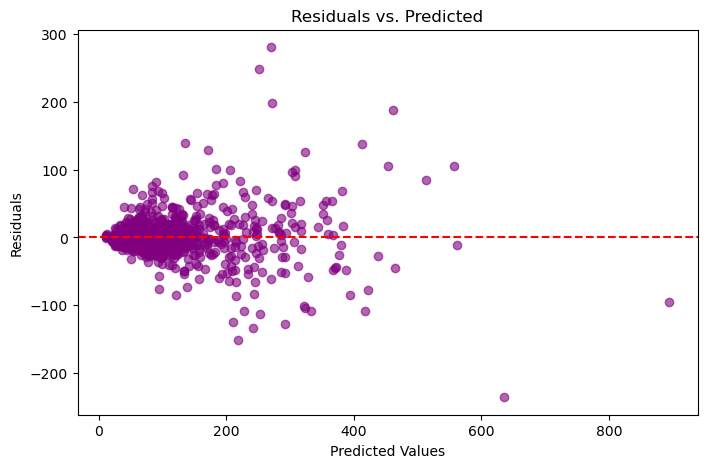

Residual Summary Statistics:
 count    1357.000000
mean        0.275815
std        27.941161
min      -235.395752
25%        -8.632632
50%        -1.349884
75%         6.890334
max       280.116730
Name: price, dtype: float64


In [259]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate residuals
residuals = y_test - y_pred_final

# Convert residuals to a DataFrame for analysis
residuals_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred_final,
    "Residuals": residuals
})

# 1. Residual Distribution Plot
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='blue')
plt.axvline(x=0, color='red', linestyle='--', label='Mean Residual = 0')
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 2. Residuals vs. Predicted Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_final, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# 3. Residual Summary Statistics
residual_summary = residuals.describe()
print("Residual Summary Statistics:\n", residual_summary)

In [265]:
import joblib

# Save the model
joblib.dump(model, 'model.pkl')

['model.pkl']